In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

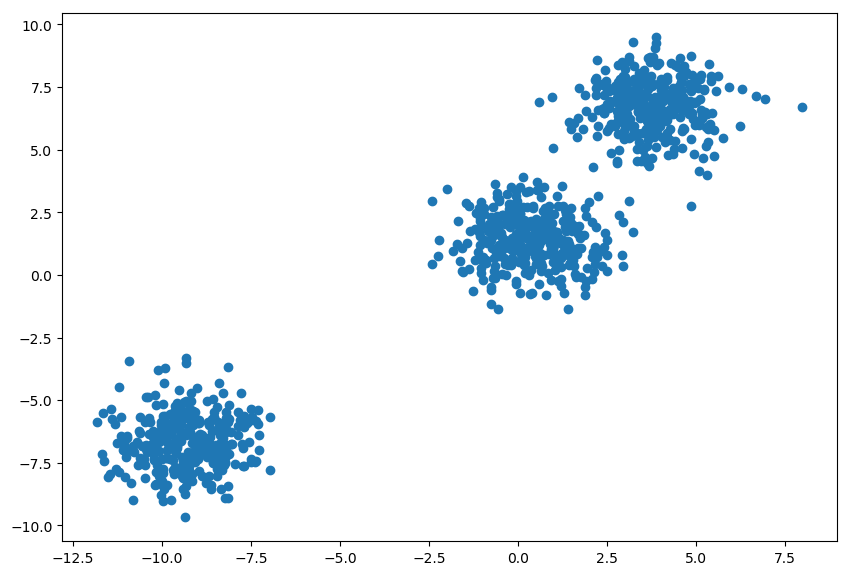

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, random_state=101)
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);

In [6]:
from sklearn.cluster import KMeans

In [9]:
Cluster=KMeans(n_clusters=3)
Cluster.fit(X)
Y_pred=Cluster.predict(X)

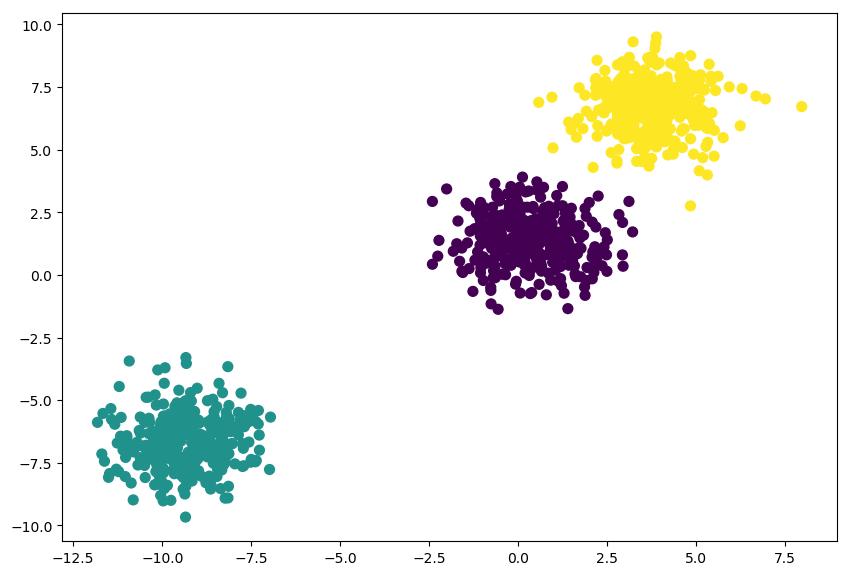

In [10]:
plt.scatter(X[:,0], X[:,1], c=Y_pred, s=50, cmap='viridis')
plt.rcParams.update({'figure.figsize': (10,7), 'figure.dpi':100})

Implementing K-Means from scratch

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# using the make_blobs dataset
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, random_state=101)
# setting the number of training examples
m=X.shape[0]
n=X.shape[1] 
n_iter=50

In [12]:
K=5
import random
centroids=np.array([]).reshape(n,0)

for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]
    
    
output={}
# repeating the above steps again and again
for i in range(n_iter):
    euclid=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((X-centroids[:,k])**2,axis=1)
        euclid=np.c_[euclid,dist]
    C=np.argmin(euclid,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(2,0)
    for k in range(m):
        cent[C[k]]=np.c_[cent[C[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent

Text(0.5, 1.0, 'Original Dataset')

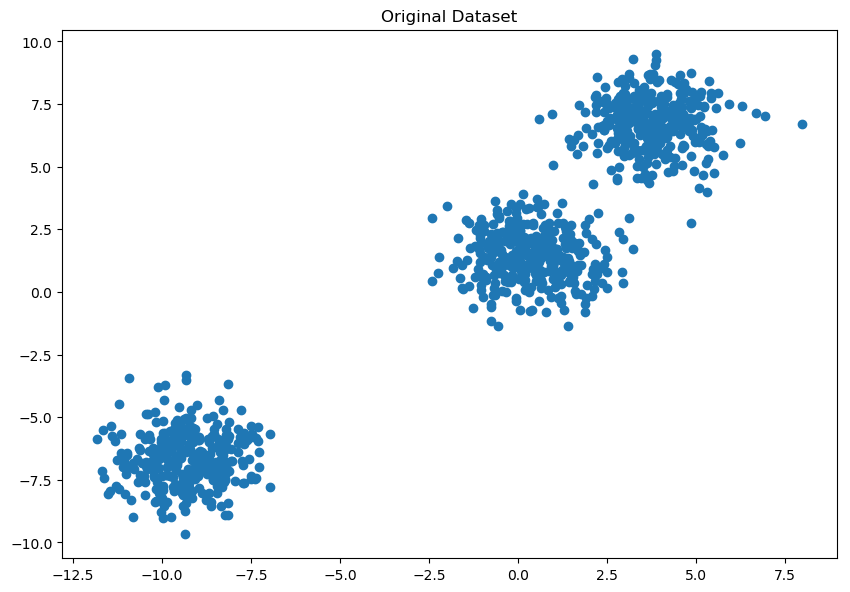

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

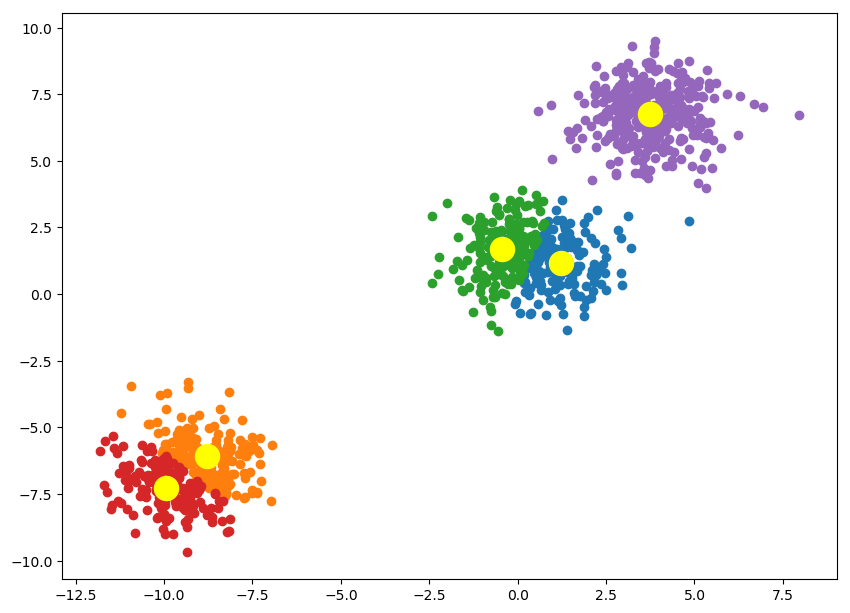

In [14]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

Elbow method to find the optimal number of clusters


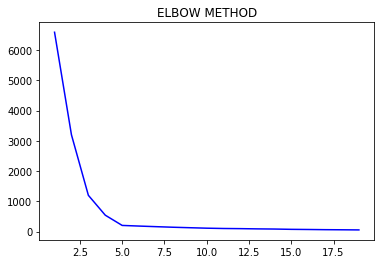

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)


import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

In [ ]:
X = df.iloc[:, [2, 4]].values

In [ ]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

In [ ]:
import seaborn as sns
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(X)

In [ ]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50)
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=500,color='yellow')
plt.title('Clusters')
plt.legend()
plt.show()